# Part 4

For part 4 of the project, you will be using your MySQL database from part 3 to answer meaningful questions for your stakeholder. They want you to use your hypothesis testing and statistics knowledge to answer 3 questions about what makes a successful movie.

# Import

In [124]:
import pandas as pd
import numpy as np
import os, time,json
import tmdbsimple as tmdb 
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats
import scipy


# Load df_combined 

In [128]:
df_combined = pd.read_csv('Data/final_tmdb_data_combined.csv.gz')
df_combined



,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,genres_list
0,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,3.291,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/1SEj4nyG3JPBSKBbFht...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,unknow,"['Comedy', 'Music', 'Romance']"
1,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,2.566,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,unknow,['Science Fiction']
2,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.840,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,unknow,"['Drama', 'Action', 'Crime']"
3,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",24.889,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 255, 'logo_path': None, 'name': 'Parad...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.100,2070.0,PG,"['Drama', 'Romance']"
4,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",3.993,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 1596, 'logo_path': None, 'name': 'Shoo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.813,48.0,R,['Drama']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146048,NaN,NaN,NaN,0.0,[],NaN,599083.0,ml,ഓട്ടം,"Set in Trivandrum, the story of Ottam unfolds ...",0.661,/8jh1rKWivbrztzbQZc0K9ebyc4B.jpg,"[{'id': 117820, 'logo_path': None, 'name': 'Th...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2019-03-08,0.0,120.0,"[{'english_name': 'Malayalam', 'iso_639_1': 'm...",Released,NaN,Ottam,0.0,0.000,0.0,unknow,[]
146049,NaN,/htoReVItKtolso5VJqFqJDBaOwm.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,635903.0,ml,മനോഹരം,Manoharan is a poster artist struggling to fin...,1.374,/cNWfJlveyMEbiORrKmFKZZRDx75.jpg,"[{'id': 113177, 'logo_path': None, 'name': 'Ne...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2019-09-27,0.0,122.0,"[{'english_name': 'Malayalam', 'iso_639_1': 'm...",Released,NaN,Manoharam,0.0,6.136,11.0,unknow,"['Comedy', 'Drama']"
146050,NaN,/z6YpkQiWLnRKl5yQD9dSiPDFWN.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,711261.0,en,No Apology,When a group of women struggle to deal with th...,0.635,/fqIWD97MAjgrj8mB2M78kxeSSnk.jpg,[],[],2019-10-23,0.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,No Apology,0.0,8.000,1.0,unknow,['Drama']
146051,NaN,/tjHUeULyw2vtS1DXFp0OHfhUzRX.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,598553.0,ca,La vida

### Explore data 

In [85]:
# check missing values
df_combined.isna().sum()

adult                     88459
backdrop_path             55377
belongs_to_collection    136840
budget                        0
genres                        0
homepage                 111892
id                            0
original_language             0
original_title                0
overview                   3449
popularity                    0
poster_path               12917
production_companies          0
production_countries          0
release_date               2274
revenue                       0
runtime                       0
spoken_languages              0
status                        0
tagline                   93926
title                         0
video                         0
vote_average                  0
vote_count                    0
certification                 0
genres_list                   0
dtype: int64

In [86]:
# check duplicates 
df_combined.duplicated().sum()

30864

In [87]:
# drop duplicates
df_combined = df_combined.drop_duplicates()
# check again 
df_combined.duplicated().sum()

0

In [88]:
# checking missing values in certification column
nan_certification = df_combined['certification'].isna().sum()
print(f'there are {nan_certification} movies with missing certification')

there are 0 movies with missing certification


In [89]:
# replace nan per unknow
df_combined['certification'] = df_combined['certification'].fillna('unknow')

C:\Users\Ernesto\AppData\Local\Temp\ipykernel_15328\3013348432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['certification'] = df_combined['certification'].fillna('unknow')


In [90]:
# check missing values again
nan_certification = df_combined['certification'].isna().sum()
print(f'there are {nan_certification} movies with missing certification')

there are 0 movies with missing certification


In [91]:
df_combined['certification'].value_counts()

unknow    86797
R         11790
NR         6406
PG-13      6270
PG         2774
G           846
NC-17       306
Name: certification, dtype: int64

In [92]:
# there are 2 R and PG-13, let's check what is the problem 
df_combined['certification'].unique()

array(['unknow', 'PG', 'R', 'G', 'NR', 'PG-13', 'NC-17'], dtype=object)

In [93]:
# replace - to 'NR' and remove white space
## fix certification col
repl_cert = {'PG-13 ':'PG-13', 'R ':'R', 'UR':'NR', 'Not Rated':'NR', 'Unrated':'NR', '-':'NR', '10':'unknow',
             'ScreamFest Horror Film Festival':'NR'}

df_combined['certification'] = df_combined['certification'].replace(repl_cert)
df_combined['certification'].value_counts(dropna=False)

C:\Users\Ernesto\AppData\Local\Temp\ipykernel_15328\1070025149.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['certification'] = df_combined['certification'].replace(repl_cert)


unknow    86797
R         11790
NR         6406
PG-13      6270
PG         2774
G           846
NC-17       306
Name: certification, dtype: int64

In [94]:
# checking missing values in revenue column
nan_revenue = df_combined['revenue'].isna().sum()
print(f'there are {nan_revenue} movies with missing revenue')

there are 0 movies with missing revenue


In [95]:
# drop row with missing values 
df_combined = df_combined.dropna(subset=['revenue'])

In [96]:
# checking missing values in revenue column
nan_revenue = df_combined['revenue'].isna().sum()
print(f'there are {nan_revenue} movies with missing revenue')

there are 0 movies with missing revenue


In [97]:
df_combined['revenue'].value_counts()

0.0           100009
10000.0           60
2000000.0         38
100000.0          34
1000000.0         32
               ...  
41624687.0         2
18696602.0         2
1190456.0          2
8880045.0          2
236880.0           2
Name: revenue, Length: 7081, dtype: int64

### 1. State the Hypothesis & Null Hypothesis

 H0 (Null Hypothesis): no difference in revenue amount between all MPAA rating.
 
 
 HA(Alternative Hypothesis): there is a significant difference in revenue amount between ratings.

### 2. Determine the correct test to perform.

Type of Data? numeric

How many groups/samples?  more than two

Therefore, which test is appropriate? ANOVA

In [98]:
rating_names = df_combined['certification'].unique()
rating_names

array(['unknow', 'PG', 'R', 'G', 'NR', 'PG-13', 'NC-17'], dtype=object)

### 3. Testing Assumptions

In [99]:
## Create groups dictionary. There are only 4 groups
groups = {}
## Loop through all unique categories
for i in df_combined['certification'].unique():
    ## Get series for group and rename
    data = df_combined.loc[df_combined['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['unknow', 'PG', 'R', 'G', 'NR', 'PG-13', 'NC-17'])

#### No significant outliers - outliers ( z > 3)

In [100]:
groups_clean = {}
## Loop through groups dict
for sector_name, grp_data in groups.items():
    
    ## determine if there are any outliers
    idx_outliers = np.abs(stats.zscore(grp_data)) > 3
    ## print a statement about how many outliers for which group name
    print(f'there were {idx_outliers.sum()} outliers in {sector_name}')

    ## Remove the outiers from data and overwrite the sector data in the dict
    grp_data_cln = grp_data[idx_outliers == False]
    groups_clean[sector_name] = grp_data_cln
    

there were 372 outliers in unknow
there were 78 outliers in PG
there were 234 outliers in R
there were 20 outliers in G
there were 56 outliers in NR
there were 168 outliers in PG-13
there were 4 outliers in NC-17


#### Normality

In [101]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups_clean.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
unknow,86425.0,0.000000e+00,145070.547684
PG,2696.0,0.000000e+00,1621.635748
R,11556.0,0.000000e+00,8654.089247
G,826.0,2.467663e-135,619.891432
NR,6350.0,0.000000e+00,10406.636682
PG-13,6102.0,0.000000e+00,3883.010824
NC-17,302.0,7.958193e-79,359.660041


In [102]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
unknow,86425.0,0.000000e+00,145070.547684,True
PG,2696.0,0.000000e+00,1621.635748,True
R,11556.0,0.000000e+00,8654.089247,True
G,826.0,2.467663e-135,619.891432,True
NR,6350.0,0.000000e+00,10406.636682,True
PG-13,6102.0,0.000000e+00,3883.010824,True
NC-17,302.0,7.958193e-79,359.660041,True


Our p-values for all group are below 0.05 which means our data is NOT normally distributed. However, our our sample size is large enough (n>20) to proceed without satisfying this test.

#### Equal Variance

In [103]:
# with the * operator 
stats.levene(*groups_clean.values())

LeveneResult(statistic=3489.4665552031784, pvalue=0.0)

p<0.05 fail the assumption of equal variance we need select a non-parametric equivalent test - Kruskal-Wallis test

### 4 - Final Hypothesis Test

In [104]:
## Run final test and get p-value
stats.kruskal(*groups_clean.values())

KruskalResult(statistic=25049.15683681448, pvalue=0.0)

### 5 - Interpret your p-value and reject or fail to reject your null hypothesis

p < 0.05 - reject null hypothesis and support the alternate hypothesis there is a significant difference in revenue amount between ratings.

### 6 - Show a supporting visualization that helps display the result

#### Average

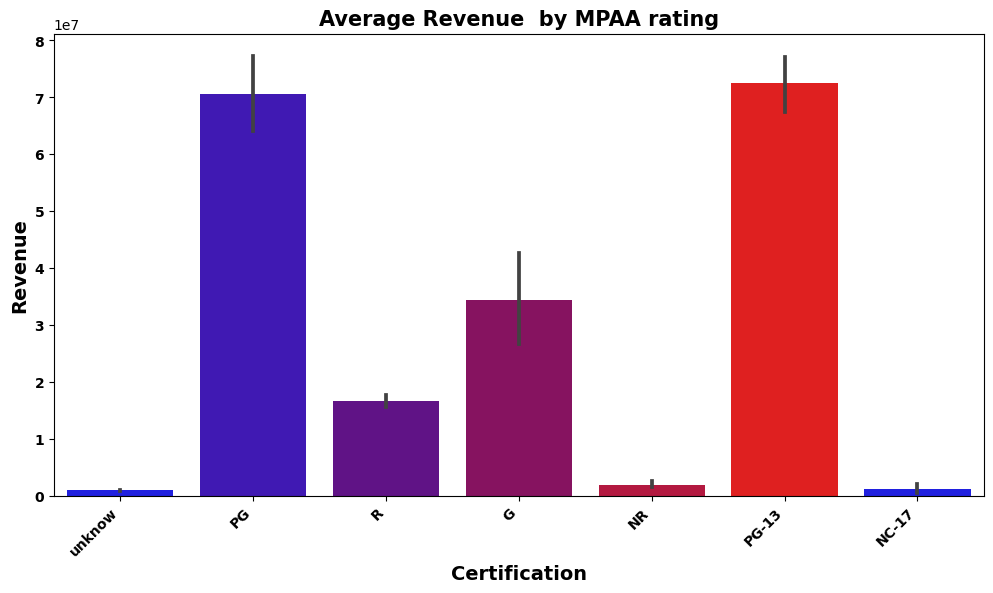

In [105]:
fig, ax = plt.subplots(figsize=(12,6))
palette = sns.blend_palette(['blue', 'red'])
ax= sns.barplot(data = df_combined, x='certification', y = 'revenue', palette= palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha= 'right')
plt.title('Average Revenue  by MPAA rating', fontsize=15, weight='bold')
plt.xlabel('Certification', fontsize = 14, weight='bold')
plt.ylabel('Revenue', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');
plt.show()

PG and PG3 were the rating with higher average revenue, NR, NC-17 and Unknow were the rating with lower average revenue.

#### Total

In [106]:
top = df_combined.groupby('certification')['revenue'].sum()
df_top = pd.DataFrame(top).sort_values('revenue', ascending = False)
df_top
     

,revenue
certification,
PG-13,4.549163e+11
R,1.961991e+11
PG,1.955306e+11
unknow,8.235198e+10
G,2.901076e+10
NR,1.238956e+10
NC-17,3.530844e+08


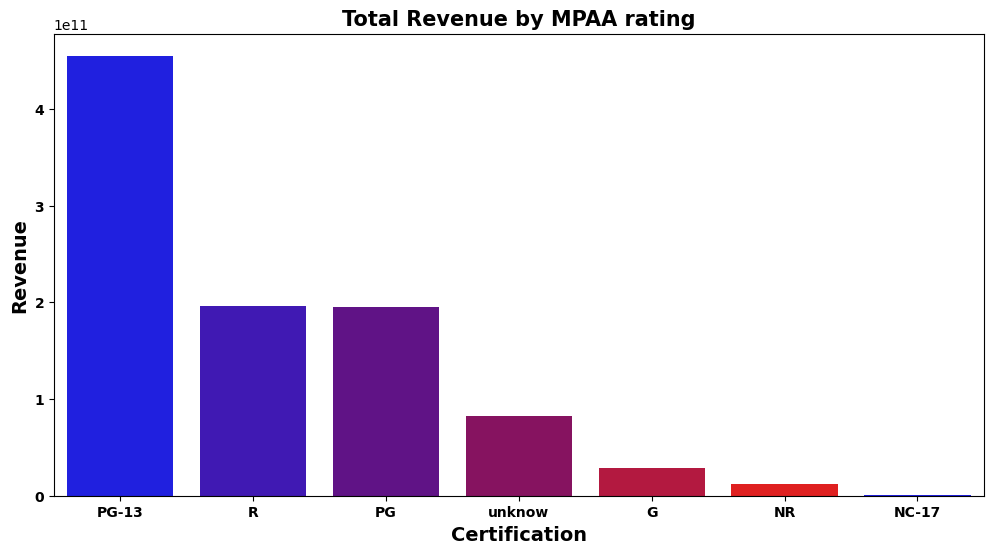

In [107]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data=df_top, y='revenue', x=df_top.index, palette=palette); 

plt.title('Total Revenue by MPAA rating', fontsize = 15, weight='bold')
plt.xlabel('Certification', fontsize = 14, weight='bold')
plt.ylabel('Revenue', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');

plt.show;


PG13 was ratting with the higher total revenue amount. G, NR and NC-17 were the  ratting with lower total revenue.  

### Post-Hoc Multiple Comparison Test

In [108]:
## slice a test sector
temp = None

In [109]:
## make a list for saving the dataframes to
tukeys_dfs = []

## Loop through groups dict's items
for sector, temp in groups_clean.items():
    
    ## make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'revenue' : temp, 'certification': sector})
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,revenue,certification
0,0.0,unknow
1,0.0,unknow
2,0.0,unknow
7,0.0,unknow
8,0.0,unknow
...,...,...
112870,0.0,NC-17
113060,0.0,NC-17
113259,0.0,NC-17
113274,0.0,NC-17


In [110]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## save the values as kg_lost and the labels to the Diet
values = tukeys_data['revenue']
labels = tukeys_data['certification']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values, labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-19226705.0622,0.0,-25058900.2895,-13394509.8349,True
G,NR,-19205405.469,0.0,-22413412.6162,-15997398.3219,True
G,PG,26929511.9041,0.0,23480333.1152,30378690.693,True
G,PG-13,27549654.8129,0.0,24334152.6011,30765157.0248,True
G,R,-9592716.0291,0.0,-12716439.6962,-6468992.362,True
G,unknow,-19399207.1439,0.0,-22431327.8578,-16367086.4301,True
NC-17,NR,21299.5932,1.0,-5086769.754,5129368.9404,False
NC-17,PG,46156216.9663,0.0,40893337.8192,51419096.1134,True
NC-17,PG-13,46776359.8751,0.0,41663580.0956,51889139.6547,True
NC-17,R,9633989.0331,0.0,4578426.5374,14689551.5288,True


There is no difference (p>0.05) between: 

                               NC-17 and NR
                               
                               NC-17 and unknow
                               
                               NR and unknow
                               
                               PG AND PG3

These groups have similar x values in tukey plot below: 

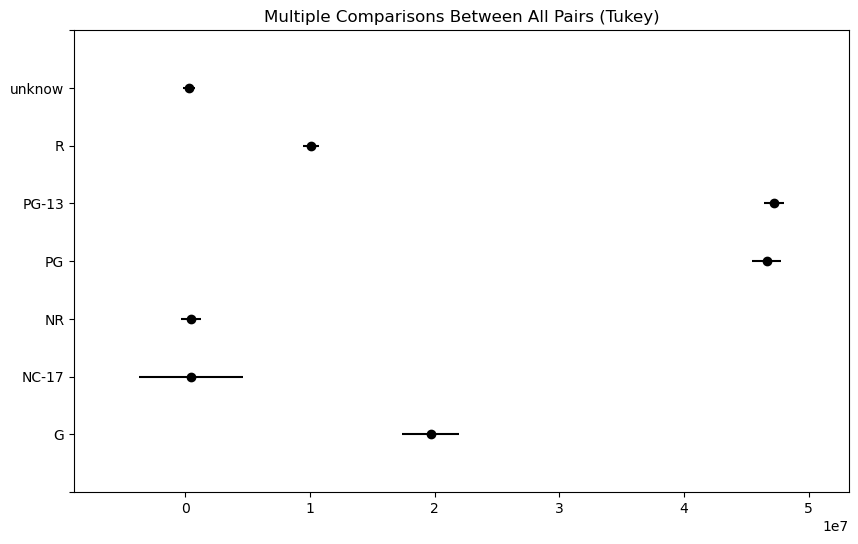

In [111]:
## also can use built-in plot tukeys_reuslts.plot_simultaneous
tukeys_results.plot_simultaneous(); 

# Q2 - Do some movie genres earn more revenue than others?

In [112]:
df_combined['genres']

0         [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...
1                  [{'id': 878, 'name': 'Science Fiction'}]
2         [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...
3         [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
4                             [{'id': 18, 'name': 'Drama'}]
                                ...                        
115184                       [{'id': 10752, 'name': 'War'}]
115185    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
115186    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
115187    [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...
116485                        [{'id': 18, 'name': 'Drama'}]
Name: genres, Length: 115189, dtype: object

In [113]:
## Function to get just the genre names as a list 

def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [114]:
## Use our function and exploding the new column
#get_genre_name(df.loc[3,'genres'])

# use get_genre_name and convert all the genere name in list
df_combined['genres_list'] = df_combined['genres'].apply(get_genre_name)
df_explode = df_combined.explode('genres_list')
df_explode

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,genres_list
0,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,3.291,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/1SEj4nyG3JPBSKBbFht...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,unknow,Comedy
0,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,3.291,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/1SEj4nyG3JPBSKBbFht...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,unknow,Music
0,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,3.291,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/1SEj4nyG3JPBSKBbFht...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,unknow,Romance
1,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,2.566,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,unknow,Science Fiction
2,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.840,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,unknow,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115186,NaN,/d98qmYGL6S7ku7txjBvE8Zy0SMQ.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,633490.0,en,Safeguard,When a Japanese restaurant is extorted by the ...,2.369,/f0jCuYay5LC5cNJBhS0zNZkkQtW.jpg,[],"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2020-09-07,0.0,94.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Protecting your family comes at a cost.,Safeguard,0.0,6.500,2.0,unknow,Thriller
115186,NaN,/d98qmYGL6S7ku7txjBvE8Zy0SMQ.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,633490.0,en,Safeguard,When a Japanese restaurant is extorted by the ...,2.369,/f0jCuYay5LC5cNJBhS0zNZkkQtW.jpg,[],"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2020-09-07,0.0,94.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Protecting your family comes at a cost.,Safeguard,0.0,6.500,2.0,unknow,Crime
115187,NaN,/imgc14olSDlAlf1z3nC11cL8Zyn.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.avalon.me/production/feature-films/...,655187.0,eu,Akelarre,"French Basque Country, year 1609. The men of a...",9.778,/lyB3yoQbGO3LiCVuSOD2g17Hr6p.jpg,[],"[{'iso_3166_1': 'AR', 'name': 'Argentina'}, {'...",2020-10-02,0.0,92.0,"[{'english_name': 'Basque', 'iso_639_1': 'eu',...",Released,NaN,Coven,0.0

In [115]:
# check missing values 
df_explode['genres_list'].isna().sum()

11050

In [116]:
# replace nan per unknow
df_explode['genres_list'] = df_explode['genres_list'].fillna('Unknow')

In [117]:
# check missing values 
df_explode['genres_list'].isna().sum()

0

In [118]:
## save unique genres

unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller',
       'History', 'Family', 'Mystery', 'Western', 'Unknow', 'War',
       'TV Movie', 'Documentary'], dtype=object)

In [119]:
# checking missing values in revenue column
nan_revenue = df_explode['revenue'].isna().sum()
print(f'there are {nan_revenue} movies with missing revenue')

there are 0 movies with missing revenue


In [120]:
# checking duplicates 
df_explode.duplicated().sum()

24

In [121]:
# drop duplicates 
df_explode = df_explode.drop_duplicates()
df_explode.duplicated().sum()

0

In [122]:
## Function to get just the production_companies names as a list 

def get_production_companies_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    production_companies = []
    for companie in x:
        production_companies.append(companie['name'])
    return production_companies

In [123]:
# use get_genre_name and convert all the genere name in list
df_combined['companies_list'] = df_combined['production_companies'].apply(get_production_companies_name)
df_explode = df_combined.explode('companies_list')
df_explode

JSONDecodeError: Expecting value: line 1 column 140 (char 139)

### 1. State the Hypothesis & Null Hypothesis

 H0 (Null Hypothesis): no difference in revenue amount between all genres.
 
 
 HA(Alternative Hypothesis): there is a significant difference in revenue amount between genres.

### 2. Determine the correct test to perform.

Type of Data? numeric

How many groups/samples?  more than two

Therefore, which test is appropriate? ANOVA

### 3. Testing Assumptions

In [57]:
## Create groups dictionary. There are only 4 groups
groups = {}
## Loop through all unique categories
for i in df_explode['genres_list'].unique():
    ## Get series for group and rename
    data = df_explode.loc[df_explode['genres_list']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action', 'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller', 'History', 'Family', 'Mystery', 'Western', 'Unknow', 'War', 'TV Movie', 'Documentary'])

#### No significant outliers - outliers ( z > 3)

In [58]:
groups_clean = {}
## Loop through groups dict
for sector_name, grp_data in groups.items():
    
    ## determine if there are any outliers
    idx_outliers = np.abs(stats.zscore(grp_data)) > 3
    ## print a statement about how many outliers for which group name
    print(f'there were {idx_outliers.sum()} outliers in {sector_name}')

    ## Remove the outiers from data and overwrite the sector data in the dict
    grp_data_cln = grp_data[idx_outliers == False]
    groups_clean[sector_name] = grp_data_cln

there were 468 outliers in Comedy
there were 32 outliers in Music
there were 236 outliers in Romance
there were 116 outliers in Science Fiction
there were 640 outliers in Drama
there were 272 outliers in Action
there were 130 outliers in Crime
there were 186 outliers in Adventure
there were 118 outliers in Animation
there were 138 outliers in Fantasy
there were 282 outliers in Horror
there were 288 outliers in Thriller
there were 62 outliers in History
there were 146 outliers in Family
there were 130 outliers in Mystery
there were 12 outliers in Western
there were 6 outliers in Unknow
there were 30 outliers in War
there were 2 outliers in TV Movie
there were 4 outliers in Documentary


#### Normality

 Our our sample size is large enough (n>20) to proceed without satisfying this test.

#### Equal Variance

In [59]:
# with the * operator 
stats.levene(*groups_clean.values())

LeveneResult(statistic=632.8419058595822, pvalue=0.0)

p<0.05 fail the assumption of equal variance we need select a non-parametric equivalent test - Kruskal-Wallis test

### 4 - Final Hypothesis Test

In [60]:
## Run final test and get p-value
stats.kruskal(*groups_clean.values())

KruskalResult(statistic=7400.252465943913, pvalue=0.0)

### 5 - Interpret your p-value and reject or fail to reject your null hypothesis

p < 0.05 - reject null hypothesis and support the alternate hypothesis there is a significant difference in revenue amount between genres.

### 6 - Show a supporting visualization that helps display the result

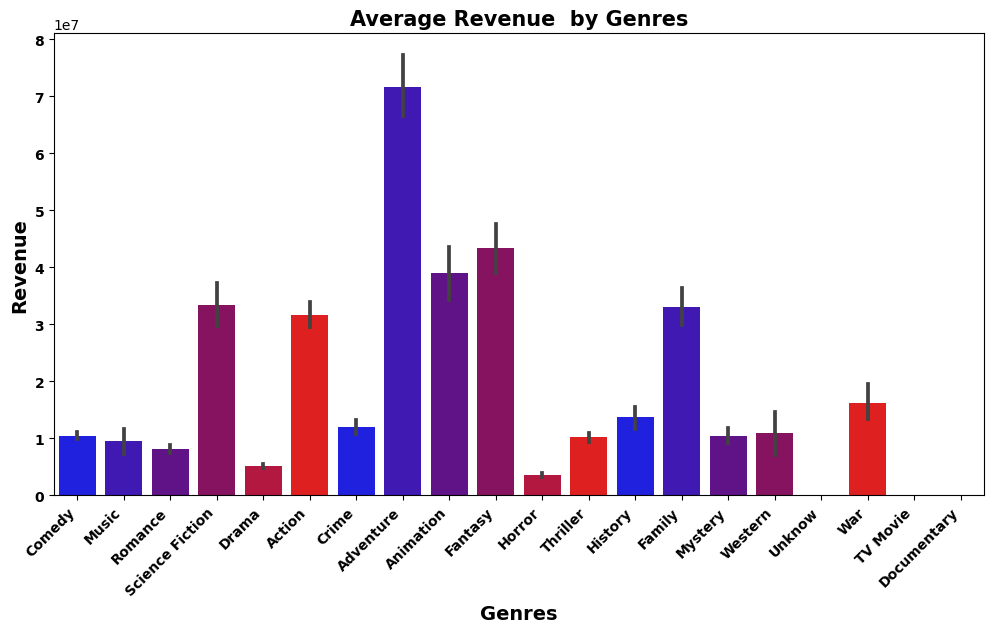

In [61]:
fig, ax = plt.subplots(figsize=(12,6))
palette = sns.blend_palette(['blue', 'red'])
ax= sns.barplot(data = df_explode, x='genres_list', y = 'revenue', palette= palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha= 'right')
plt.title('Average Revenue  by Genres', fontsize=15, weight='bold')
plt.xlabel('Genres', fontsize = 14, weight='bold')
plt.ylabel('Revenue', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');
plt.show()

Adventure was the genre with higher average revenue. Documentary, TV movie horror and drama were the genres with lower average revenue. 

In [62]:
top = df_explode.groupby('genres_list')['revenue'].sum()
df_top = pd.DataFrame(top).sort_values('revenue', ascending = False)
df_top
     

,revenue
genres_list,
Adventure,4.391334e+11
Action,4.325081e+11
Comedy,3.244071e+11
Drama,2.797090e+11
Fantasy,2.288542e+11
Thriller,2.105968e+11
Science Fiction,2.062271e+11
Family,2.054115e+11
Animation,1.503770e+11


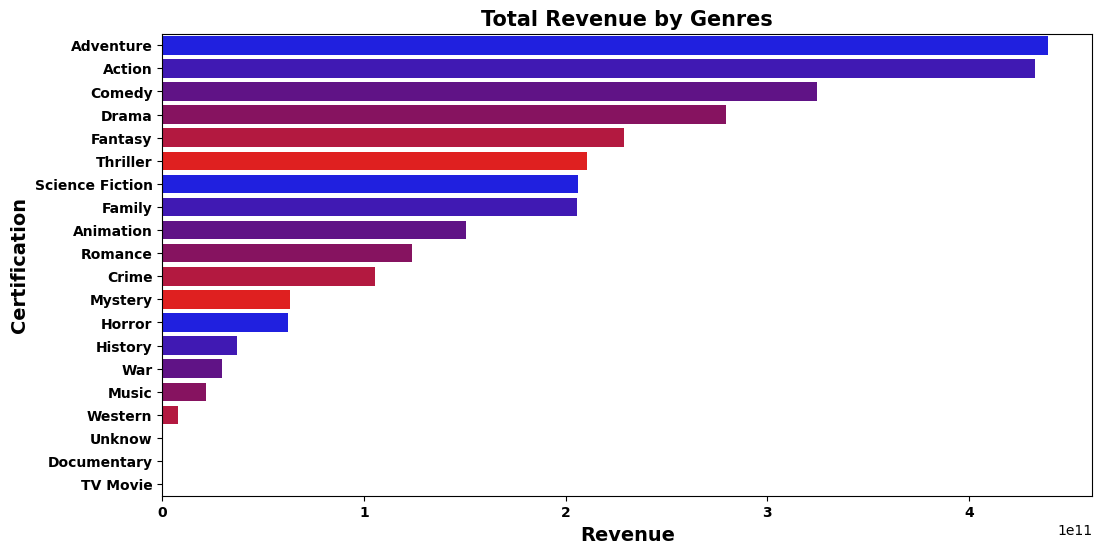

In [63]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data=df_top, x='revenue', y=df_top.index, palette=palette); 

plt.title('Total Revenue by Genres', fontsize = 15, weight='bold')
plt.ylabel('Certification', fontsize = 14, weight='bold')
plt.xlabel('Revenue', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');

plt.show;


Adventure and Action were the genres with higher total revenue. TV Movie, Documentary and unknow were the genres with lower total revenue. 

### Post-Hoc Multiple Comparison Test

In [64]:
## slice a test sector
temp = None
## make a list for saving the dataframes to
tukeys_dfs = []

## Loop through groups dict's items
for sector, temp in groups_clean.items():
    
    ## make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'revenue' : temp, 'genres_list': sector})
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,revenue,genres_list
1,0.0,Comedy
7,0.0,Comedy
8,0.0,Comedy
9,0.0,Comedy
10,80334.0,Comedy
...,...,...
113657,0.0,Documentary
113678,0.0,Documentary
113891,0.0,Documentary
113944,0.0,Documentary


In [65]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## save the values as kg_lost and the labels to the Diet
values = tukeys_data['revenue']
labels = tukeys_data['genres_list']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values, labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Action,Adventure,25534679.5796,0.0,23684493.7705,27384865.3888,True
Action,Animation,1977057.4669,0.1444,-220904.6754,4175019.6092,False
Action,Comedy,-11118909.8462,0.0,-12349832.5894,-9887987.103,True
Action,Crime,-9414632.1005,0.0,-11050302.2668,-7778961.9342,True
Action,Documentary,-15811535.068,0.0,-20156989.31,-11466080.826,True
Action,Drama,-13778533.6864,0.0,-14924215.7379,-12632851.6349,True
Action,Family,604033.4582,0.9998,-1234262.3285,2442329.2449,False
Action,Fantasy,4990315.7176,0.0,3043281.8547,6937349.5804,True
Action,History,-8412107.9029,0.0,-10930860.1795,-5893355.6263,True
Action,Horror,-14791105.8339,0.0,-16164243.1845,-13417968.4834,True


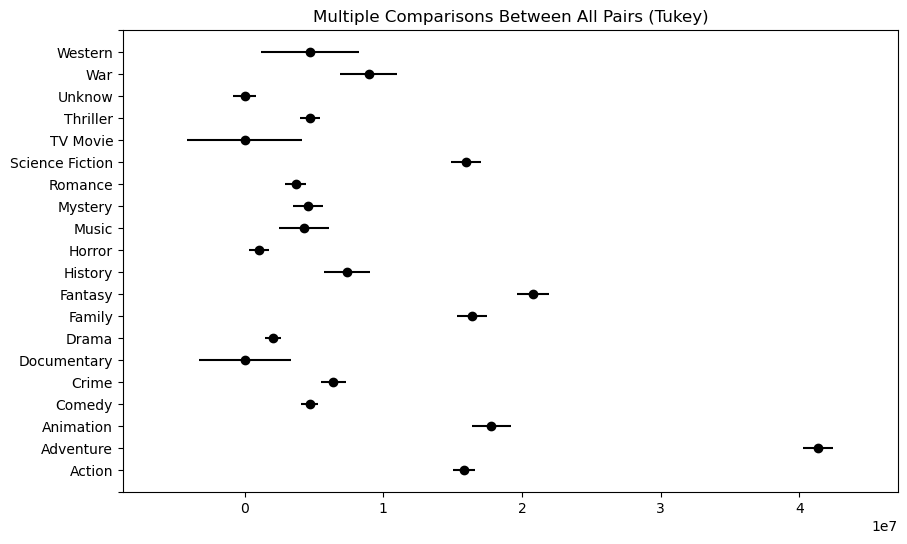

In [66]:
## also can use built-in plot tukeys_reuslts.plot_simultaneous
tukeys_results.plot_simultaneous(); 

Adventure was the genres with with more different revenue. 

# Q3 - Are some genres higher popularity than others?

In [67]:
pd.set_option('display.max_columns',100)
df_explode.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,genres_list
1,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,3.291,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/1SEj4nyG3JPBSKBbFht...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,unknow,Comedy
1,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,3.291,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/1SEj4nyG3JPBSKBbFht...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,unknow,Music
1,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,3.291,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/1SEj4nyG3JPBSKBbFht...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,unknow,Romance
2,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,2.566,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,unknow,Science Fiction
3,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",0.840,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,unknow,Drama


In [68]:
# check missing values 
df_explode['genres_list'].isna().sum()

0

In [69]:
# check missing values 
df_explode['popularity'].isna().sum()

0

### 1. State the Hypothesis & Null Hypothesis

H0 (Null Hypothesis): no difference in popularity between all genres.

HA(Alternative Hypothesis): there is a significant difference in popularity  between genres.


### 2. Determine the correct test to perform.

Type of Data? numeric

How many groups/samples?  more than two

Therefore, which test is appropriate? ANOVA

### 3. Testing Assumptions

In [70]:
## Create groups dictionary. There are only 4 groups
groups = {}
## Loop through all unique categories
for i in df_explode['genres_list'].unique():
    ## Get series for group and rename
    data = df_explode.loc[df_explode['genres_list']==i,'popularity'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action', 'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller', 'History', 'Family', 'Mystery', 'Western', 'Unknow', 'War', 'TV Movie', 'Documentary'])

#### No significant outliers - outliers ( z > 3



In [71]:
groups_clean = {}
## Loop through groups dict
for sector_name, grp_data in groups.items():
    
    ## determine if there are any outliers
    idx_outliers = np.abs(stats.zscore(grp_data)) > 3
    ## print a statement about how many outliers for which group name
    print(f'there were {idx_outliers.sum()} outliers in {sector_name}')

    ## Remove the outiers from data and overwrite the sector data in the dict
    grp_data_cln = grp_data[idx_outliers == False]
    groups_clean[sector_name] = grp_data_cln

there were 450 outliers in Comedy
there were 38 outliers in Music
there were 218 outliers in Romance
there were 30 outliers in Science Fiction
there were 890 outliers in Drama
there were 114 outliers in Action
there were 186 outliers in Crime
there were 16 outliers in Adventure
there were 60 outliers in Animation
there were 16 outliers in Fantasy
there were 358 outliers in Horror
there were 336 outliers in Thriller
there were 42 outliers in History
there were 22 outliers in Family
there were 122 outliers in Mystery
there were 2 outliers in Western
there were 142 outliers in Unknow
there were 34 outliers in War
there were 12 outliers in TV Movie
there were 18 outliers in Documentary


#### Normality

 Our sample size is large enough (n>20) to proceed without satisfying this test.

#### Equal Variance

In [72]:
# with the * operator 
stats.levene(*groups_clean.values())

LeveneResult(statistic=1076.0417110776177, pvalue=0.0)

p<0.05 fail the assumption of equal variance we need select a non-parametric equivalent test - Kruskal-Wallis test

### 4 - Final Hypothesis Test

In [73]:
## Run final test and get p-value
stats.kruskal(*groups_clean.values())

KruskalResult(statistic=26463.294214022164, pvalue=0.0)

### 5 - Interpret your p-value and reject or fail to reject your null hypothesis

p < 0.05 - reject null hypothesis and support the alternate hypothesis there is a significant difference in popularity between genres.

### 6 - Show a supporting visualization that helps display the result

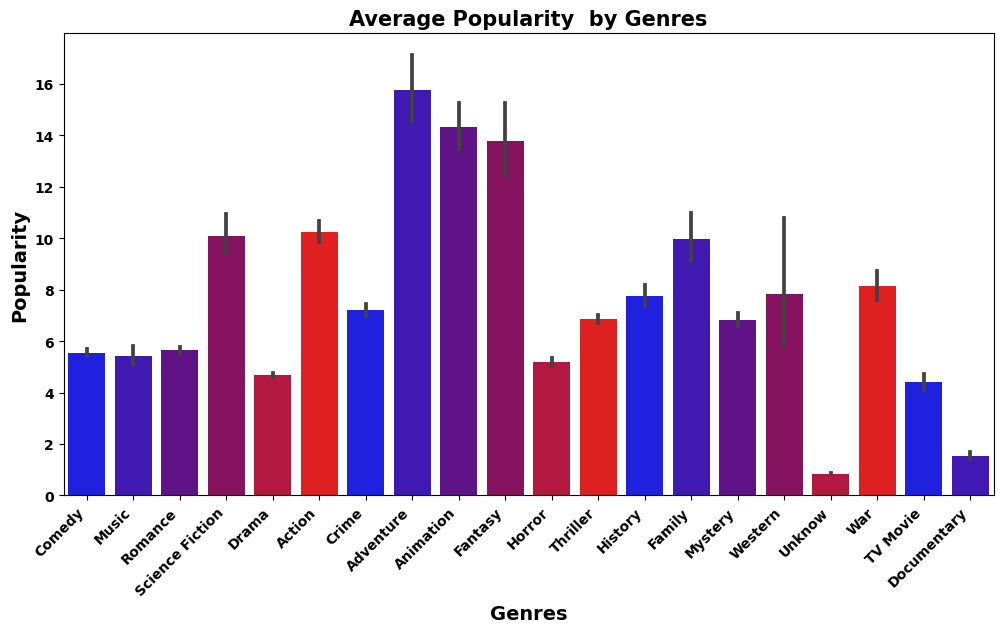

In [74]:
fig, ax = plt.subplots(figsize=(12,6))
palette = sns.blend_palette(['blue', 'red'])
ax= sns.barplot(data = df_explode, x='genres_list', y = 'popularity', palette= palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha= 'right')
plt.title('Average Popularity  by Genres', fontsize=15, weight='bold')
plt.xlabel('Genres', fontsize = 14, weight='bold')
plt.ylabel('Popularity', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');
plt.show()

Adventure, Animation and Fantasy were genres with higher popularity. Documentary was the genre with lower popularity. 

Let's do Post-Hoc Multiple Comparison Test to see if these difference are significant 

### Post-Hoc Multiple Comparison Test

In [75]:
## slice a test sector
temp = None
## make a list for saving the dataframes to
tukeys_dfs = []

## Loop through groups dict's items
for sector, temp in groups_clean.items():
    
    ## make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'popularity' : temp, 'genres_list': sector})
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,popularity,genres_list
1,3.291,Comedy
7,1.091,Comedy
8,0.600,Comedy
9,13.040,Comedy
10,9.293,Comedy
...,...,...
113657,0.670,Documentary
113678,0.600,Documentary
113891,0.616,Documentary
113944,1.804,Documentary


In [76]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## save the values as kg_lost and the labels to the Diet
values = tukeys_data['popularity']
labels = tukeys_data['genres_list']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values, labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Action,Adventure,5.0636,0.0,4.5932,5.534,True
Action,Animation,3.1008,0.0,2.5395,3.662,True
Action,Comedy,-4.4249,0.0,-4.7402,-4.1096,True
Action,Crime,-2.9595,0.0,-3.38,-2.5389,True
Action,Documentary,-7.696,0.0,-8.8228,-6.5691,True
Action,Drama,-5.1115,0.0,-5.4049,-4.818,True
Action,Family,-0.3587,0.4189,-0.8274,0.11,False
Action,Fantasy,2.9328,0.0,2.4371,3.4286,True
Action,History,-2.1591,0.0,-2.8043,-1.5139,True
Action,Horror,-4.8083,0.0,-5.1606,-4.4559,True


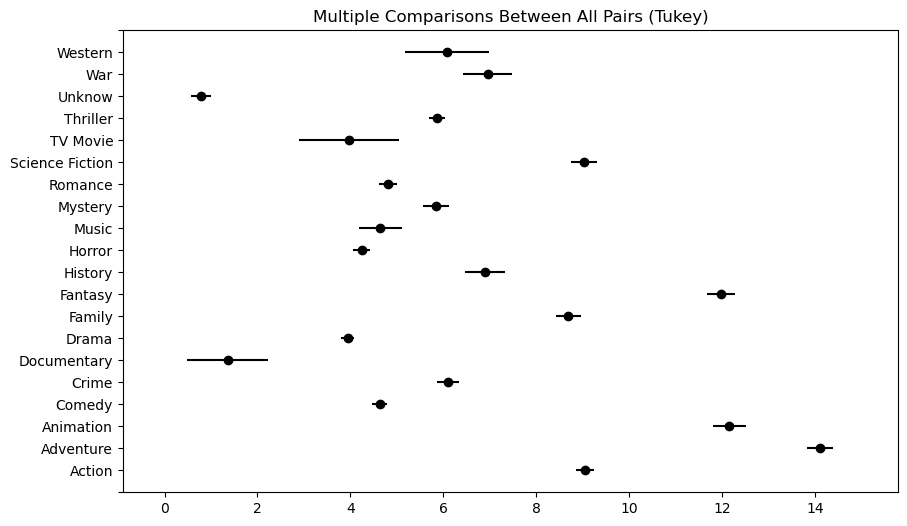

In [77]:
## also can use built-in plot tukeys_reuslts.plot_simultaneous
tukeys_results.plot_simultaneous();

Genres with similar x value  = there is no difference.